<a href="https://colab.research.google.com/github/jv-mendes07/recursos_humanos_ML/blob/main/recursos_humanos_(modelo_de_propens%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Propensão - Recursos Humanos (Problema de Classificação)
### Projeto de Machine Learning

In [268]:
# Importação de bibliotecas que serão usadas no projeto:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importação do dataset:

In [269]:
# Importação do conjunto de dados que será usado:

df = pd.read_csv('/content/drive/MyDrive/HR_comma.csv')

In [270]:
# Leitura breve das cinco primeiras linhas do conjunto de dados:

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Tratamento dos dados:

In [271]:
# Linhas e colunas do dataset atribuídas separadamente à duas variáveis:

l, c = df.shape

In [272]:
# Impressão da quantidade de linhas e de colunas contidas no dataframe:

print(f'Quantidade de Linhas: {l}')
print('\n')
print(f'Quantidade de Colunas: {c}')

Quantidade de Linhas: 14999


Quantidade de Colunas: 10


In [273]:
# Informações generalizadas do dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [274]:
# Conversão textual do nome das colunas, para que todas as colunas tenham uma formatação textual somente de letras minúsculas:

df.columns = df.columns.str.lower()

In [275]:
# Nome das colunas incluídas no dataset:

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [276]:
# Quantidade de dados ausentes no dataset:

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## Análise exploratória dos dados (EDA):

#### (1) Qual é a quantidade de funcionários demitidos e retidos desta empresa?

In [277]:
# Quantidade bruta de funcionários retidos e demitidos da empresa:

df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [278]:
# Porcentagem da quantidade de funcionários retidos e demitidos da empresa:

(df.left.value_counts(normalize = True) * 100).round(2)

0    76.19
1    23.81
Name: left, dtype: float64

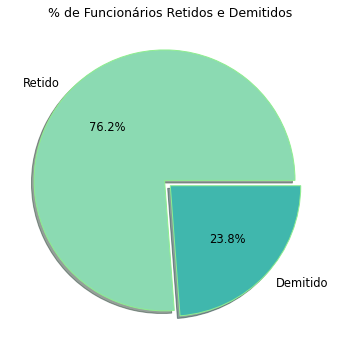

In [279]:
# Gráfico de pizza para visualizarmos proporcionalmente a quantidade de funcionários retidos e demitidos:

plt.figure(figsize = (16, 6))
plt.pie(x = df.left.value_counts(),
        labels = ['Retido', 'Demitido'],
        autopct = '%1.1f%%', explode = [0.06, 0],
        textprops = {'fontsize': 11.5,
                                      'color': 'k'},
        shadow = True, colors = sns.color_palette('mako_r'),
        wedgeprops = {'edgecolor' : 'lightgreen'})
plt.title('% de Funcionários Retidos e Demitidos', fontsize = 12.5, color = 'k')
plt.show()

#### (2) Qual é a porcentagem de funcionários por classificação salarial?

In [280]:
# % de funcionários por classificação salarial (baixo, médio ou alto salário):

(df.salary.value_counts(normalize = True) * 100).round(2)

low       48.78
medium    42.98
high       8.25
Name: salary, dtype: float64

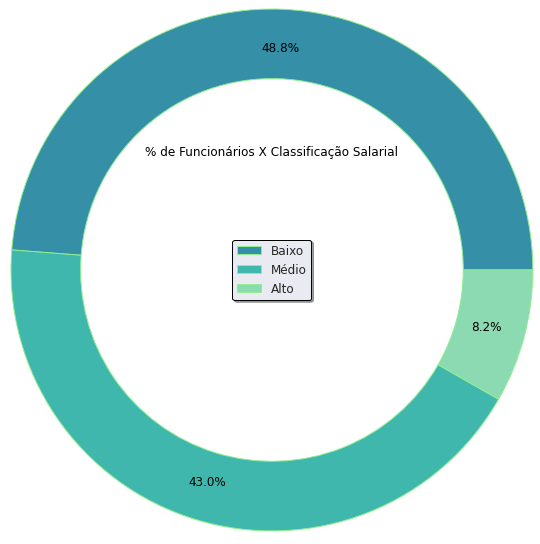

In [281]:
# Gráfico de rosca para vermos a proporção de funcionários por classificação salarial que trabalham nesta empresa:

plt.figure(figsize = (4, 4))
plt.pie(df.salary.value_counts(),
        labeldistance = 1, radius = 3, colors = sns.color_palette('mako')[3:],
        wedgeprops = dict(width = 0.8, edgecolor = 'lightgreen'), autopct = '%1.1f%%', textprops = {'fontsize': 12, 'color' : 'k'},
        pctdistance = 0.85)
plt.legend(labels = ['Baixo', 'Médio', 'Alto'], loc = 'center', prop = {'size': 12}, edgecolor = 'k', shadow = True)
plt.title('% de Funcionários X Classificação Salarial', loc = 'Center',
          fontdict = {'fontsize': 12}, color = 'k')
plt.show()

#### (3) Qual é a taxa de retenção e demissão dos funcionários por classificação salarial?

In [282]:
# Agrupamento da quantidade de funcionários demitidos e retidos por classificão salarial:

df_salary_retention = df.groupby(['salary', 'left']).agg({'left': 'size'})

In [283]:
# Renomeação da coluna:

df_salary_retention.rename(columns = {'left': 'qtd_left'}, inplace = True)

In [284]:
# Visualização da quantidade de demissões e retenções pela classificação salarial dos funcionários:

df_salary_retention

qtd_left
salary left          
high   0         1155
       1           82
low    0         5144
       1         2172
medium 0         5129
       1         1317

In [285]:
# Criação de coluna para representar a porcentagem de retenção / demissão por classificação salarial dos funcionários:

df_salary_retention = df_salary_retention.assign(perc_left = 
                           (df_salary_retention.qtd_left / 
                            df_salary_retention.qtd_left.sum() * 100)).round(2)

In [286]:
# Dataframe final com a quantidade e a porcentagem de retenção / demissão por classificação de salários dos funcionários da empresa:

df_salary_retention

qtd_left  perc_left
salary left                     
high   0         1155       7.70
       1           82       0.55
low    0         5144      34.30
       1         2172      14.48
medium 0         5129      34.20
       1         1317       8.78

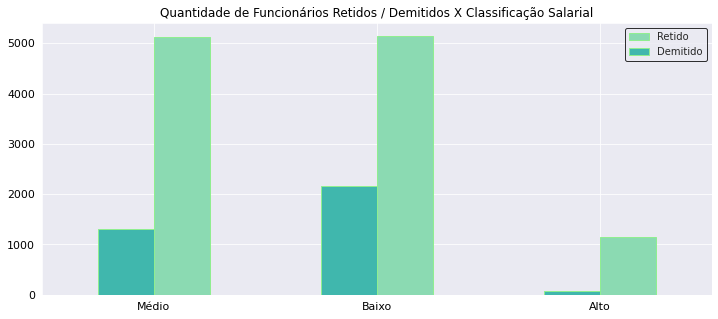

In [287]:
# Gráfico de barras horizontais para visualizarmos a quantidade de retenções e demissões por classificação salarial:

sns.set_style('darkgrid')
ax = pd.crosstab(df['salary'], df.left).plot(kind = 'bar',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('')
ax.set_xticklabels(['Alto', 'Baixo', 'Médio'],
                   fontsize = 11, color = 'k', 
                   rotation = 360)
ax.set_yticklabels(list(range(0, 5001, 1000)),
                   fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
ax.invert_xaxis()
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Classificação Salarial',
             fontsize = 12, color = 'k')
plt.show()

#### (4) Qual é a quantidade de retenções e demissões de funcionários por departamento?

In [288]:
# Agrupamento da quantidade de demissões / retenções por departamento: 

df.groupby(['department', 'left']).agg({'left': 'count'}).rename(columns = {
    'left': 'qtd_left'
}).sort_values(['left', 'qtd_left'],
               ascending = False)

,,qtd_left
department,left,
sales,1,1014
technical,1,697
support,1,555
IT,1,273
hr,1,215
accounting,1,204
marketing,1,203
product_mng,1,198
RandD,1,121


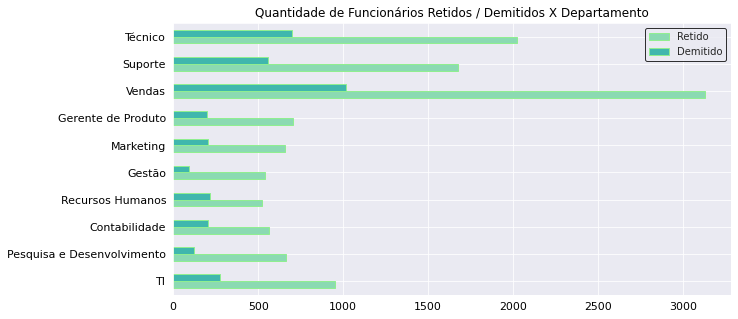

In [289]:
# Gráfico de barras horizontais para representar a quantidade de retenções e demissões por departamento:

sns.set_style('darkgrid')
ax = pd.crosstab(df['department'], df.left).plot(kind = 'barh',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(10, 5)
ax.set_xlabel('')
ax.set_yticklabels(reversed(['Técnico',                    'Suporte', 
                    'Vendas',
                    'Gerente de Produto',
                    'Marketing',
                    'Gestão',
                    'Recursos Humanos',
                    'Contabilidade',
                   'Pesquisa e Desenvolvimento',
'TI']),
                   fontsize = 11, color = 'k'
                   )
ax.set_xticklabels(list(range(0, 3001, 500)),
                   fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
#ax.invert_yaxis()
ax.set_ylabel('')
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Departamento',
             fontsize = 12, color = 'k')
plt.show()

#### (5) Qual é a média e a mediana das demais variáveis por taxa de retenção dos funcionários?

In [290]:
# Média das demais variáveis agrupada pela retenção (0) ou demissão dos funcionários: 

df.groupby('left').mean().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [291]:
# Mediana das demais variáveis agrupada pela retenção (0) ou demissão dos funcionários: 

df.groupby('left').median()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.69,0.71,4.0,198.0,3.0,0.0,0.0
1,0.41,0.79,4.0,224.0,4.0,0.0,0.0


#### (6) Qual é a taxa de funcionários retidos e demitidos que receberam promoções na empresa nos últimos 5 anos?

In [292]:
# Agrupamento de funcionários retidos e demitidos da empresa que receberam promoções nos últimos 5 anos:

df_promotion_left = df.groupby(['left', 'promotion_last_5years']).agg({'promotion_last_5years': 'count'}
                                                  ).rename(columns = {'promotion_last_5years': 'qtd_promotion_last_5years'})

In [293]:
# % de funcionários retidos e demitidos que receberam promoções nos últimos 5 anos:

df_promotion_left = df_promotion_left.assign(perc_promotion_last_5years = 
                         df_promotion_left.qtd_promotion_last_5years / df_promotion_left.qtd_promotion_last_5years.sum() * 100).round(2)

In [294]:
# Visualização do dataframe criado com a quantidade e o percentual de funcionários retidos e demitidos 
# que receberam promoções nos últimos 5 anos na empresa:

df_promotion_left

qtd_promotion_last_5years  \
left promotion_last_5years                              
0    0                                          11128   
     1                                            300   
1    0                                           3552   
     1                                             19   

                            perc_promotion_last_5years  
left promotion_last_5years                              
0    0                                           74.19  
     1                                            2.00  
1    0                                           23.68  
     1                                            0.13

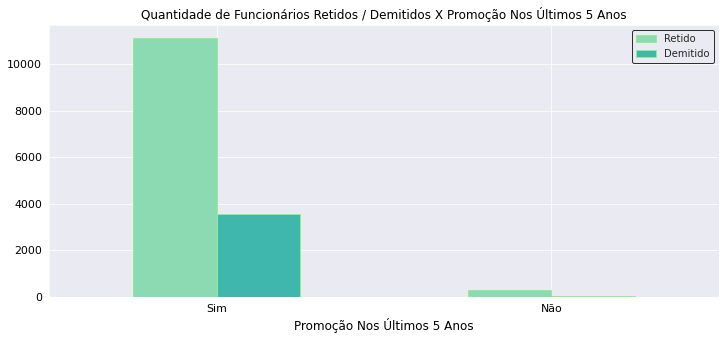

In [295]:
# Gráfico de barras horizontais para visualizarmos a quantidade de retenções e demissões que receberam
# promoções nos últimos 5 anos na empresa:

sns.set_style('darkgrid')
ax = pd.crosstab(df['promotion_last_5years'], df.left).plot(kind = 'bar',
                                             color = sns.color_palette('mako_r'),
                                             edgecolor = 'lightgreen')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Promoção Nos Últimos 5 Anos', fontsize = 12, color = 'k')
ax.set_xticklabels(['Sim', 'Não'],
                   fontsize = 11, color = 'k', 
                   rotation = 360)
ax.set_yticklabels(list(range(0, 10001, 2000)), fontsize = 11, color = 'k')
ax.legend(['Retido', 'Demitido'], fontsize = 10, edgecolor = 'k')
ax.set_title('Quantidade de Funcionários Retidos / Demitidos X Promoção Nos Últimos 5 Anos',
            fontsize = 12, color = 'k')
plt.show()

## Preparação do modelo de Machine Learning

In [296]:
# Variáveis independentes ou preditoras que serão utilizadas para prevermos a propensão de um funcionário demitir-se:

sub_df = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company',
                'promotion_last_5years']]

In [297]:
# Transformação da coluna 'salary' em números para podermos utilizar o atributo de salário no modelo de regressão logística
# Modelos de machine learning aceitam somente variáveis numéricas para treinamento e teste preditivo:

sub_df = pd.concat([sub_df, pd.get_dummies(df.salary, prefix = 'salary')], axis = 'columns')

In [298]:
# Visualização das variáveis preditoras do dataframe: 

sub_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0


### Divisão do dataset em dados de treino e dados de teste:




In [299]:
# Importação da função que será usada para dividir o dataset em dados de treino e dados de teste do modelo:

from sklearn.model_selection import train_test_split

In [300]:
X = sub_df

In [301]:
y = df.left

In [302]:
# Divisão do dataset em dados de treino e dados de teste
# 80 % dos dados serão usados para treino, e somente 20 % serão usados para testar a eficácia preditiva do modelo treinado:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [303]:
# Visualização breve dos dados de teste da variável X: 

X_test

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
2336,0.59,226,3,0,0,0,1
11172,0.67,207,3,0,0,0,1
9287,0.81,273,2,0,0,1,0
7807,0.70,264,2,0,0,0,1
6526,0.86,164,2,0,0,1,0
...,...,...,...,...,...,...,...
1846,0.46,161,3,0,0,1,0
5766,0.72,202,3,0,0,1,0
1850,0.42,135,3,0,0,1,0
14232,0.38,147,3,0,0,1,0


In [304]:
# Visualização breve dos dados de teste da variável Y: 

y_test

2336     0
11172    0
9287     0
7807     0
6526     0
        ..
1846     1
5766     0
1850     1
14232    1
10807    0
Name: left, Length: 3000, dtype: int64

### Feature Scaling

In [305]:
# Importação do método que facilitará na padronização de escala:

from sklearn.preprocessing import StandardScaler

In [306]:
# Método atribuído à uma variável:

sc = StandardScaler()

In [307]:
# Padronização de escala dos dados de treino, para que todas variáveis preditoras esteja na mesma escala de -3 e +3:

X_train_2 = sc.fit_transform(X_train)

In [308]:
# Padronização de escala dos dados de teste:

X_test_2 = sc.transform(X_test)

### Validação Cruzada (K-Fold Cross Validation)

In [309]:
# Importação do método de validação cruzada para testar todos os algoritmos de classificação:

# Importação de todos os algoritmos de classificação que serão usados para treinar o modelo:

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [310]:
# Retirar todo tipo de aviso que possa aparecer na execução das células:

import warnings

warnings.filterwarnings('ignore')

In [311]:
# Validação cruzada para treinar o modelo com o algoritmo de regressão logística:

# Retorno da média de acurácia preditiva do modelo de 0.74:

cross_val_score(LogisticRegression(), X, y).mean().round(2)

0.74

In [312]:
# Validação cruzada para treinar o modelo com o algoritmo de árvore de decisão:

# Retorno da média de acurácia preditiva do modelo de 0.97:

cross_val_score(DecisionTreeClassifier(), X, y).mean().round(2)

0.97

In [313]:
# Validação cruzada para treinar o modelo com o algoritmo de floresta aleatória:

# Retorno da média de acurácia preditiva do modelo de 0.98:

cross_val_score(RandomForestClassifier(n_estimators = 10, random_state = 0), X, y).mean().round(2)

0.98

In [314]:
# Validação cruzada para treinar o modelo com o algoritmo de Naive Bayes:

# Retorno da média de acurácia preditiva do modelo de 0.70:

cross_val_score(GaussianNB(), X, y).mean().round(2)

0.7

In [315]:
# Validação cruzada para treinar o modelo com o algoritmo de KNearest-Neighbors:

# Retorno da média de acurácia preditiva do modelo de 0.92:

cross_val_score(KNeighborsClassifier(), X, y).mean().round(2)

0.92

### Hyperparameter Tuning (GridSearch CV)

In [316]:
# Importação do método para ajustar os hiperparâmetros dos modelos com às melhores pontuações preditivas:

from sklearn.model_selection import GridSearchCV

In [376]:
# Seleção de modelos e de hiperparâmetros que serão treinados:

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [5, 10, 100]
        }
    },
    'decision_tree_classifier': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini', 'entropy']
            
        }
    },
    'knearest_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 11, 19],
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan']
            
        }
    }
}

In [377]:
# Atribuição dos modelos com às melhores pontuações e hiperparâmetros à uma variável:

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [378]:
# Exibição dos melhores modelos com às melhores pontuações preditivas e com os melhores hiperparâmetros

pd.DataFrame(scores).round(2)

,model,best_score,best_params
0,random_forest,0.98,{'n_estimators': 100}
1,decision_tree_classifier,0.97,{'criterion': 'entropy'}
2,knearest_neighbors,0.94,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."


### Implementação do algoritmo de floresta aleatória

In [379]:
# Atribuição do modelo de floresta aleatória à uma variável:

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [380]:
# Treino do modelo de floresta aleatória:

random_forest.fit(X_train_2, y_train)

RandomForestClassifier(random_state=0)

In [387]:
# Importação de métricas para avaliar a precisão preditiva do modelo:

from sklearn.metrics import confusion_matrix, accuracy_score

In [382]:
# Atribuição das classificações previstas pelo modelo com os dados de teste:

y_pred = random_forest.predict(X_test_2)

In [383]:
# Criação de uma confusão de matriz com os dados de teste previstos e os dados de teste reais:

cm = confusion_matrix(y_pred, y_test)

In [388]:
# Acurácia preditiva de 98 % do modelo de floresta aleatória:

accuracy_score(y_test, y_pred).round(2)

0.98

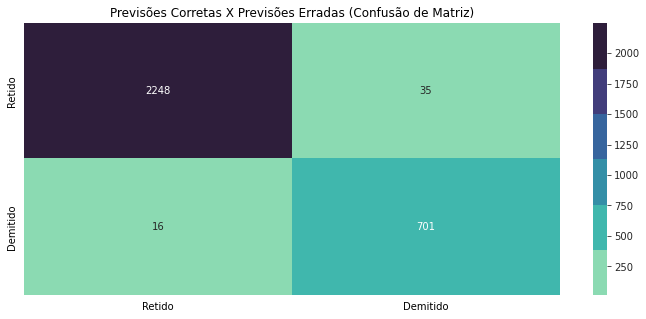

In [385]:
# Confusão de matriz para vermos quantas previsões o modelo acertou e quantas previsões o modelo errou:

plt.figure(figsize = (12, 5))
sns.heatmap(cm, annot = True, fmt = '0', cmap = sns.color_palette('mako_r'),
            xticklabels = ['Retido', 'Demitido'],
            yticklabels = ['Retido', 'Demitido'])
plt.xticks(fontsize = 10, color = 'k')
plt.yticks(fontsize = 10, color = 'k')
plt.title('Previsões Corretas X Previsões Erradas (Confusão de Matriz)',
          fontsize = 12, color = 'k');

### Previsão de um caso hipotético

In [386]:
# Previsão para saber se um funcionário hipotético continuaria na empresa ou não, dado os demais dados das demais variáveis:

random_forest.predict([[0.80, 270, 4, 1, 1, 0, 0]])

array([0])

## FIM